dataset: https://drive.google.com/drive/folders/1E5IzzUhKpYS7-oXHJKi3i37QRZGD3f8Q

# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_path = 'creditcard.csv'
df = pd.read_csv(
    dataset_path
)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:,:-1].astype(np.float64), dataset_arr[:,-1].astype(np.uint8)

In [4]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (284807, 30)
y shape: (284807,)


In [5]:
# Add bias
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate(
    (intercept, X),
    axis=1
)
X_b

array([[ 1.00000000e+00,  0.00000000e+00, -1.35980713e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.00000000e+00,  0.00000000e+00,  1.19185711e+00, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00,  1.00000000e+00, -1.35835406e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.00000000e+00,  1.72788000e+05,  1.91956501e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.00000000e+00,  1.72788000e+05, -2.40440050e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.00000000e+00,  1.72792000e+05, -5.33412522e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [6]:
# One-hot encoding
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]
print(n_classes)
print(n_samples)

y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

2
284807


## Train, val, test split

In [7]:
val_size = 0.2
test_size = 0.1
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [8]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(205060, 31) (205060, 2)
(56962, 31) (56962, 2)
(22785, 31) (22785, 2)


In [9]:
X_val

array([[ 1.00000000e+00,  1.44140000e+05, -5.81460074e-01, ...,
        -2.54862391e-01, -1.26279082e-01,  1.28200000e+01],
       [ 1.00000000e+00,  7.43690000e+04,  6.86729592e-01, ...,
         2.29058926e-02,  7.98380374e-02,  2.56390000e+02],
       [ 1.00000000e+00,  6.71070000e+04, -8.48394796e-01, ...,
         2.17840346e-01,  1.27724370e-01,  1.64400000e+01],
       ...,
       [ 1.00000000e+00,  4.79560000e+04, -5.00365590e-01, ...,
         2.75561810e-01,  1.06836219e-01,  4.45000000e+00],
       [ 1.00000000e+00,  1.71273000e+05,  1.90072760e+00, ...,
        -1.24337925e-02, -1.07314674e-02,  5.40500000e+01],
       [ 1.00000000e+00,  1.18117000e+05,  1.46612670e-01, ...,
         2.14370150e-01,  2.85213290e-01,  2.95600000e+01]])

In [10]:
y_val

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [11]:
X_test

array([[ 1.00000000e+00,  2.82370000e+04,  1.40797195e+00, ...,
        -6.82420613e-02,  5.58761293e-03,  5.30500000e+01],
       [ 1.00000000e+00,  1.65849000e+05, -1.15787166e+00, ...,
         2.27743247e-01,  4.64575694e-02,  7.20000000e+00],
       [ 1.00000000e+00,  1.30592000e+05, -3.90678058e-01, ...,
        -1.54677993e-02,  3.12067328e-02,  1.50000000e+01],
       ...,
       [ 1.00000000e+00,  1.27981000e+05,  1.99361419e+00, ...,
        -4.08664632e-02, -4.97174272e-02,  4.99900000e+01],
       [ 1.00000000e+00,  5.71860000e+04, -1.04855478e+00, ...,
        -2.25196238e-01, -1.00105168e-01,  2.35000000e+00],
       [ 1.00000000e+00,  1.17292000e+05, -6.90584819e-01, ...,
         4.02583164e-02, -8.02364105e-02,  1.86100000e+01]])

In [12]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Normalize data

* Sử dụng `X_train` để fit vào hàm normalize `StandardScaler`
* Dùng scaler này để normalize X_val và X_test (ko normalize bias nên skip cột đầu tiên)

In [13]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

## Setup function

In [14]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

def compute_loss(y_hat, y):
    n = y.size

    return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

    return acc

## Training data

![image.png](./training_data_flow.png)

Lưu ý rằng, với Softmax Regression, mỗi class sẽ có một bộ trọng số riêng ứng với các
đặc trưng đầu vào (bao gồm cả bias). Vì vậy, cần khởi tạo trọng số θ với shape =
(n_features, n_classes).

In [15]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)
)

In [16]:
train_accs =  []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:')
    print(f'\tTraining loss: {train_batch_loss:.3f} - Training acc: {train_batch_acc:.3f}')
    print(f'\tValidation loss: {val_batch_loss:.3f} - Validation acc: {val_batch_acc:.3f}')


EPOCH 1:
	Training loss: 0.298 - Training acc: 0.744
	Validation loss: 0.295 - Validation acc: 0.746

EPOCH 2:
	Training loss: 0.172 - Training acc: 0.913
	Validation loss: 0.170 - Validation acc: 0.914

EPOCH 3:
	Training loss: 0.111 - Training acc: 0.973
	Validation loss: 0.110 - Validation acc: 0.974

EPOCH 4:
	Training loss: 0.079 - Training acc: 0.988
	Validation loss: 0.078 - Validation acc: 0.988

EPOCH 5:
	Training loss: 0.060 - Training acc: 0.993
	Validation loss: 0.059 - Validation acc: 0.993

EPOCH 6:
	Training loss: 0.048 - Training acc: 0.996
	Validation loss: 0.047 - Validation acc: 0.996

EPOCH 7:
	Training loss: 0.040 - Training acc: 0.998
	Validation loss: 0.039 - Validation acc: 0.998

EPOCH 8:
	Training loss: 0.034 - Training acc: 0.998
	Validation loss: 0.034 - Validation acc: 0.999

EPOCH 9:
	Training loss: 0.030 - Training acc: 0.999
	Validation loss: 0.030 - Validation acc: 0.999

EPOCH 10:
	Training loss: 0.027 - Training acc: 0.999
	Validation loss: 0.027 - V

## Visualize

Text(0.5, 1.0, 'Validation Accuracy')

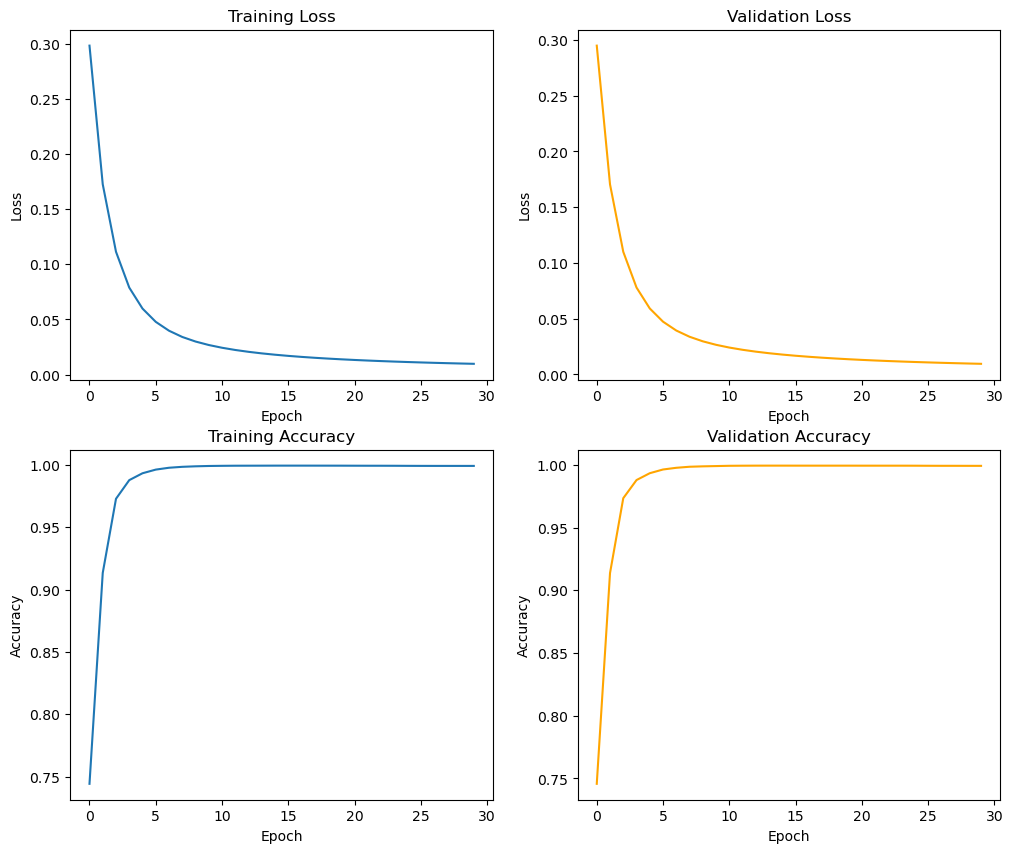

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

## Model validation

In [18]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set
Accuracy: 0.9993153330290369
Accuracy: 0.9990783410138249


# Twitter Sentiment Analysis

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /home/jiggle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
dataset_path = './Twitter_Data.csv'
df = pd.read_csv(
    dataset_path
)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [21]:
df = df.dropna()

## Preprocssing data

### Normalize text

In [22]:
def text_normalizer(text):
    text = text.lower()

    # Retweet old acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

### Init tf-idf vectorizer

In [23]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [24]:
# Add bias
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [25]:
n_classes = df['category'].nunique()
n_samples = df['category'].size
print(n_classes)
print(n_samples)

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

3
162969


In [26]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

: 

## Setup function

In [ ]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z / exp_z.sum(axis=1)[:, None]

def compute_loss(y_hat, y):
    n = y.size

    return (-1 / n) * np.sum(y * np.log(y_hat))

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

    return acc

## Model training

In [ ]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)
)

In [ ]:
train_accs =  []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:')
    print(f'\tTraining loss: {train_batch_loss:.3f} - Training acc: {train_batch_acc:.3f}')
    print(f'\tValidation loss: {val_batch_loss:.3f} - Validation acc: {val_batch_acc:.3f}')

## Visualize

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

## Model validation

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta )
test_set_acc = compute_accuracy(X_test, y_test, theta )
print('Evaluation on validation and test set:')
print(f'Accuracy : { val_set_acc }')
print(f'Accuracy : { test_set_acc }')